<a href="https://colab.research.google.com/github/devak23/python/blob/master/ml2/01_neural_network_regression_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with NeuralNetwork using TensorFlow

There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical value based on the compbination of some input variables, even shorter ... predicting a number.

In [2]:
import tensorflow as tf
print (tf.__version__)

2.15.0


## Create some data to view and fit

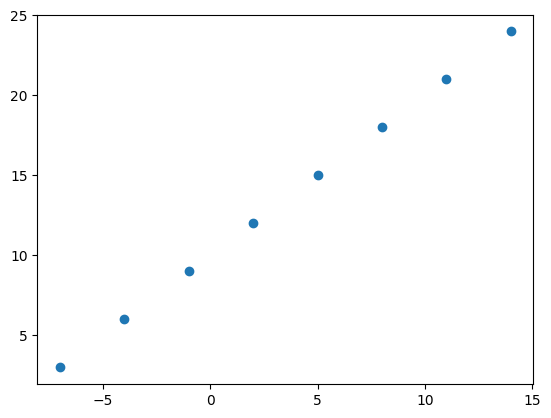

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [4]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [5]:
y == X + 10 # this is the relationship that we want our neural network to learn

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[1], y[1]

(-4.0, 6.0)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [10]:
X[0].ndim

0

In [11]:
X[0], y[0] # We are going to use 1 X value to predict 1 y value

(-7.0, 3.0)

In [12]:
# Turn our numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

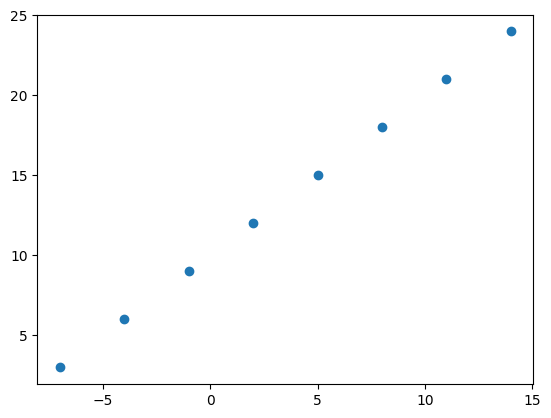

In [14]:
plt.scatter(X, y)

## Steps in modelling with tensorflow

1. **Creating the model** - define input and output layers as well as the hidden layers of a deep learning model
2. **Compiling the model** - define a loss function (in other words, the function which tells our model how wrong it is) and the optimizer  (tells our model how to improve the pattern its learning) and evaulation metrics (What we can use to intepret the performance of our model)
3. **Fitting the model** - letting our model try to find patterns between X and y (features and labels)

In [15]:
tf.reshape(X, shape=(-1,1))

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae = mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD = stochastic gradient descent
              metrics=["mae"]
)

# 3. Fitting the model
# model.fit(X, y, epochs=5) # this doesn't work!

model.fit(tf.reshape(X, shape=(-1,1)),y, epochs=5) # If we change the epochs to 32 (by experimentation) we can predict the y given X with a good accuracy.

#model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # This does the same thing.

Epoch 1/5
1/1 [==============================] - 1s 523ms/step - loss: 18.7015 - mae: 18.7015
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 18.4203 - mae: 18.4203
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 18.1390 - mae: 18.1390
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 17.8578 - mae: 17.8578
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 17.5765 - mae: 17.5765


In [17]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
# try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 130ms/step


array([[-14.77162]], dtype=float32)

In [19]:
y_pred + 10 # as you can see that due to the loss function (error), our y value is off. If we add 10 (error) to our prediction is still bad as we expect 27 and we are getting 12

array([[-4.77162]], dtype=float32)

## Improving our model

We can improve our model by the steps we took to create our model

1. **Creating a model:** We might add layers, increase the number of hidden units (called as neurons) within each of the hidden layers, change the activation function of each layer

2. **Compiling a model:** We can change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model:** Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from


In [20]:
# Lets rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model (this time we will train for longer)
model.fit(tf.reshape(X, shape=(-1,1)), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 376ms/step - loss: 13.1401 - mae: 13.1401
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0076 - mae: 13.0076
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.8751 - mae: 12.8751
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.7426 - mae: 12.7426
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.6101 - mae: 12.6101
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4776 - mae: 12.4776
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 12.3451 - mae: 12.3451
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2126 - mae: 12.2126
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 12.0801 - mae: 12.0801
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9476 - mae: 11.9476
Epoch 11/100
1/1 [==============================

In [21]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 135ms/step


array([[29.98308]], dtype=float32)

In [25]:
# Lets try to add more nodes this time
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), # The most important hyper-parameter of many different neural network
              metrics = ["mae"])

model.fit(tf.reshape(X, shape=(-1, 1)), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 962ms/step - loss: 13.0218 - mae: 13.0218
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 10.0759 - mae: 10.0759
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 6.6180 - mae: 6.6180
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 4.5763 - mae: 4.5763
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 5.4365 - mae: 5.4365
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 4.5681 - mae: 4.5681
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 3.9299 - mae: 3.9299
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 4.9449 - mae: 4.9449
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 4.9669 - mae: 4.9669
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 3.9361 - mae: 3.9361
Epoch 11/100
1/1 [==============================] - 0s 13ms/step

In [26]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 143ms/step


array([[29.372509]], dtype=float32)

## Common ways to improve deep model:

1. Adding layers
2. Increase the number of hidden units
3. Change the activation functions
4. Change the optimization function
5. Change the learning rate of the optimizer
6. Fitting on more data
7. Fitting for longer

## Evaluating a model

In practise a typical workflow you will go through when building a neural network is:

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it again -> fit it again -> evaluate it again ...
```

So so far we have done all of that **including evaluation** too by the way of predicting a value and checking with our expected results.

When it comes to evaluation, there are 3 words you should memorize: (When you are building model, you should experiment experiment and experiment)

> "Visualize", "Visualize", "Visualize"

Its a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model - what does our model look like?
* The training - how does our model perform while it learns?
* The predictions - How do the predictions of a model line up against the ground truth (the original labels)


In [28]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [29]:
# make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

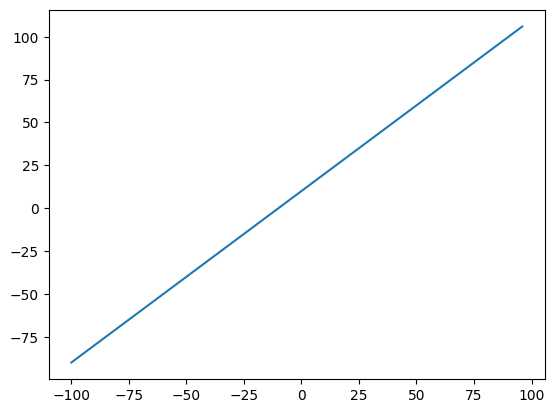

In [31]:
# lets visualize the data
import matplotlib.pyplot as plt

plt.plot(X, y)

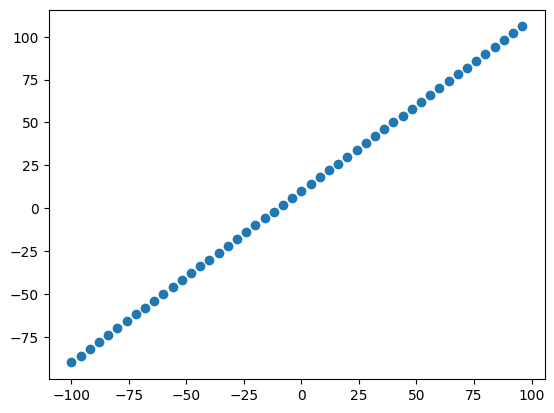

In [32]:
# A better plot is always scatter in such cases
plt.scatter(X, y)

### The 3 sets ...

* **Training set** - the model learns from this data which is typically 70-80% data you have available
* **Validation set** - the model gets tuned on this data, which is typically 10-15% data you have available
* **Test set** - the model gets evaluated on this data, which is typically 10-15% of the total data available

What are we going for in here with all the 3 datasets and model training?

**Generalization** - The ability for a machine learning model to perform well on the data it hasn't seen before


In [33]:
# Check the length of the samples we have
len(X)

50

In [34]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing sampels (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now that we have got our training and test data sets... lets visualize it again!

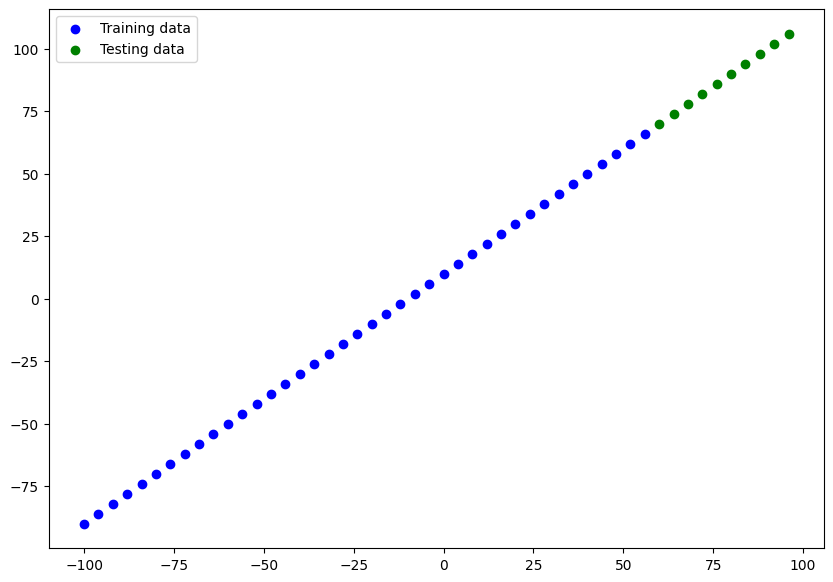

In [35]:
plt.figure(figsize=(10,7))

# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()


In [43]:
# Build the model with the training data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.mae,
              metrics=['mae'])

model.fit(tf.reshape(X_train, shape=(-1,1)), y_train, epochs=100, verbose=0)


In [38]:
# Now lets use the testing data to see if our model has learnt the relation
model.predict(X_test), y_test

1/1 [==============================] - 0s 64ms/step


(array([[ 69.32683 ],
        [ 73.30979 ],
        [ 77.29277 ],
        [ 81.27575 ],
        [ 85.25872 ],
        [ 89.24171 ],
        [ 93.224686],
        [ 97.20766 ],
        [101.190636],
        [105.17362 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

## We can also visualize the model

In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 50)                100       
                                                                 
 dense_18 (Dense)            (None, 50)                2550      
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2701 (10.55 KB)
Trainable params: 2701 (10.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# Lets create a model which builds automatically bu defining the input_shape argument
tf.random.set_seed(42)

# Create a model
new_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# compile the model
new_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

new_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model. These are the patterns that our model is going to learn. In our case, we are trying to learn the pattern between X and y.
* Trainable params - these are parameters (patterns) the model can update as it trains
* Non-traininable params - these parameters aren't updated during training (this is typical when you bring in already learnt patterns or parameters from other models during **transfer learning**)

📚 **Resource:** For more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video

🏋 **Exercise:** Try playing around with number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

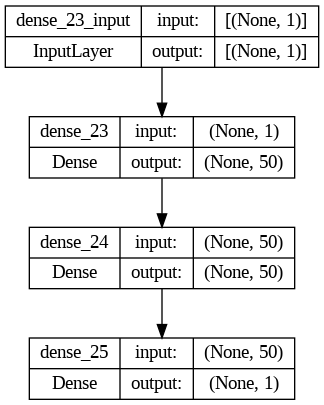

In [46]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)